In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:


df = pd.read_csv("bank-full.csv") 

data = []
for i in df.values:
    for j in i:
        data.append(j.replace('"','').split(';'))

        
columns = 0
for i in df.columns:
    columns = i.replace('"','').split(';')

df = pd.DataFrame(data,columns=columns)

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
convert_dict = {'age': int, 'job': str,'marital':str,'education':str, 'default':str, 'balance':int, 'housing':str,
       'loan':str, 'contact':str, 'day':int, 'month':str, 'duration':int, 'campaign':int, 'pdays':int,
       'previous':int, 'poutcome':str,"y":str} 

df = df.astype(convert_dict)
df.head

<bound method NDFrame.head of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day

In [5]:
df.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

# Conveting Target Varible as 1 for yes and 0 for No

In [6]:
df['y'] = df['y'].replace({'yes':1, 'no':0})

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


# As per EDA  and my understaninding following Data Performing  data cleaning, missing value treatment, outlier treatment on Data.

#  Coloum Name  "Job"  Data Type Categorical and Lables consits 14. As per plot I found that Data is splitted on the basis of Indian seasons like Summer , winter and Rainy season so i applied Ordinal encoding on the basis of season ( Target Guided Ordinal Encoding )


In [8]:
df.groupby(['job'])['y'].mean()


job
admin            0.000000
admin.           0.122074
blue-collar      0.072750
entrepreneur     0.082717
housemaid        0.087903
management       0.137585
mgmt             0.000000
retired          0.227915
self-employed    0.118429
services         0.088830
student          0.286780
technician       0.110570
unemployed       0.155027
unknown          0.118056
Name: y, dtype: float64

In [9]:
df.groupby(['job'])['y'].mean().sort_values().index

Index(['admin', 'mgmt', 'blue-collar', 'entrepreneur', 'housemaid', 'services',
       'technician', 'unknown', 'self-employed', 'admin.', 'management',
       'unemployed', 'retired', 'student'],
      dtype='object', name='job')

In [10]:
ordinal_labels=df.groupby(['job'])['y'].mean().sort_values().index
ordinal_labels

Index(['admin', 'mgmt', 'blue-collar', 'entrepreneur', 'housemaid', 'services',
       'technician', 'unknown', 'self-employed', 'admin.', 'management',
       'unemployed', 'retired', 'student'],
      dtype='object', name='job')

In [11]:
enumerate(ordinal_labels,0)

In [12]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

{'admin': 0,
 'mgmt': 1,
 'blue-collar': 2,
 'entrepreneur': 3,
 'housemaid': 4,
 'services': 5,
 'technician': 6,
 'unknown': 7,
 'self-employed': 8,
 'admin.': 9,
 'management': 10,
 'unemployed': 11,
 'retired': 12,
 'student': 13}

In [13]:
df['job']=df['job'].map(ordinal_labels2)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,10,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,6,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,3,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,2,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,7,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


# Coloum Name  Education Data type Categorical and labes 4 Applied  Nomial Mean Encoding

In [14]:
#df['education'] = df['education'].replace({'primary':3,'secondary':1,'tertiary':2,'unknown':4})

In [15]:
mean_ordinal=df.groupby(['education'])['y'].mean().to_dict()


In [16]:
mean_ordinal

{'primary': 0.08626477886439936,
 'secondary': 0.10559434531505904,
 'tertiary': 0.15006390496955116,
 'unknown': 0.13570274636510501}

In [17]:
df['education']=df['education'].map(mean_ordinal)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,10,married,0.150064,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,6,single,0.105594,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,3,married,0.105594,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,2,married,0.135703,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,7,single,0.135703,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


# Coloum Name Month Data type Categorical and labes 12 Applied Nomial Mean Encoding

In [18]:
mean_ordinal=df.groupby(['month'])['y'].mean().to_dict()


In [19]:
mean_ordinal

{'apr': 0.19679399727148705,
 'aug': 0.11013286377461182,
 'dec': 0.4672897196261682,
 'feb': 0.1664779161947905,
 'jan': 0.10121168923734854,
 'jul': 0.09093546047860769,
 'jun': 0.10222804718217562,
 'mar': 0.519916142557652,
 'may': 0.06719453726572715,
 'nov': 0.10151133501259446,
 'oct': 0.43766937669376693,
 'sep': 0.46459412780656306}

In [20]:
df['month']=df['month'].map(mean_ordinal)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,10,married,0.150064,no,2143,yes,no,unknown,5,0.067195,261,1,-1,0,unknown,0
1,44,6,single,0.105594,no,29,yes,no,unknown,5,0.067195,151,1,-1,0,unknown,0
2,33,3,married,0.105594,no,2,yes,yes,unknown,5,0.067195,76,1,-1,0,unknown,0
3,47,2,married,0.135703,no,1506,yes,no,unknown,5,0.067195,92,1,-1,0,unknown,0
4,33,7,single,0.135703,no,1,no,no,unknown,5,0.067195,198,1,-1,0,unknown,0


# Coloum Name "day" Data type Categorical and labes 12 Applied Nomial Mean Encoding

In [21]:
mean_ordinal=df.groupby(['day'])['y'].mean().to_dict()


In [22]:
mean_ordinal

{1: 0.2795031055900621,
 2: 0.14075792730085074,
 3: 0.164967562557924,
 4: 0.15916955017301038,
 5: 0.112565445026178,
 6: 0.09368530020703934,
 7: 0.0864061640066043,
 8: 0.10912052117263844,
 9: 0.11467008327994875,
 10: 0.23091603053435114,
 11: 0.12237998647734956,
 12: 0.15221459762944478,
 13: 0.15205047318611986,
 14: 0.11363636363636363,
 15: 0.13975337639459776,
 16: 0.13568904593639575,
 17: 0.09076843733883445,
 18: 0.09878682842287695,
 19: 0.06943653955606147,
 20: 0.06976744186046512,
 21: 0.09921026653504442,
 22: 0.17016574585635358,
 23: 0.134185303514377,
 24: 0.13870246085011187,
 25: 0.15833333333333333,
 26: 0.11207729468599034,
 27: 0.13380909901873328,
 28: 0.07814207650273224,
 29: 0.07392550143266476,
 30: 0.17305236270753513,
 31: 0.07153965785381027}

In [23]:
df['day']=df['day'].map(mean_ordinal)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,10,married,0.150064,no,2143,yes,no,unknown,0.112565,0.067195,261,1,-1,0,unknown,0
1,44,6,single,0.105594,no,29,yes,no,unknown,0.112565,0.067195,151,1,-1,0,unknown,0
2,33,3,married,0.105594,no,2,yes,yes,unknown,0.112565,0.067195,76,1,-1,0,unknown,0
3,47,2,married,0.135703,no,1506,yes,no,unknown,0.112565,0.067195,92,1,-1,0,unknown,0
4,33,7,single,0.135703,no,1,no,no,unknown,0.112565,0.067195,198,1,-1,0,unknown,0


# Coloum Name "pdays" Data type Categorical and labes 12 Applied Nomial Mean Encoding

In [24]:
mean_ordinal=df.groupby(['pdays'])['y'].mean().to_dict()


In [25]:
mean_ordinal

{-1: 0.09157330735509012,
 1: 0.4,
 2: 0.05405405405405406,
 3: 0.0,
 4: 0.5,
 5: 0.0,
 6: 0.1,
 7: 0.0,
 8: 0.0,
 9: 0.25,
 10: 0.6666666666666666,
 12: 0.0,
 13: 0.5,
 14: 0.1111111111111111,
 15: 0.0,
 17: 0.25,
 18: 0.0,
 19: 0.0,
 20: 0.5,
 21: 0.25,
 22: 0.3333333333333333,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.25,
 28: 0.1111111111111111,
 29: 0.3333333333333333,
 30: 0.0,
 31: 0.2,
 32: 0.0,
 33: 0.5,
 34: 0.5,
 35: 0.375,
 36: 0.25,
 37: 0.25,
 38: 0.6666666666666666,
 39: 0.0,
 40: 0.42857142857142855,
 41: 0.4,
 42: 0.0,
 43: 0.5,
 44: 0.3333333333333333,
 45: 0.0,
 46: 0.0,
 47: 0.0,
 48: 0.5,
 49: 0.3333333333333333,
 50: 0.25,
 51: 0.0,
 52: 1.0,
 53: 0.6666666666666666,
 54: 0.0,
 55: 0.75,
 56: 0.4,
 57: 0.75,
 58: 0.3333333333333333,
 59: 0.0,
 60: 0.2857142857142857,
 61: 0.0,
 62: 0.2,
 63: 0.4444444444444444,
 64: 0.5,
 65: 1.0,
 66: 0.6666666666666666,
 67: 0.3333333333333333,
 68: 0.0,
 69: 0.25,
 70: 0.42857142857142855,
 71: 0.5,
 72: 0.5,
 73: 0.2,
 74: 0.428571

In [26]:
df['pdays']=df['pdays'].map(mean_ordinal)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,10,married,0.150064,no,2143,yes,no,unknown,0.112565,0.067195,261,1,0.091573,0,unknown,0
1,44,6,single,0.105594,no,29,yes,no,unknown,0.112565,0.067195,151,1,0.091573,0,unknown,0
2,33,3,married,0.105594,no,2,yes,yes,unknown,0.112565,0.067195,76,1,0.091573,0,unknown,0
3,47,2,married,0.135703,no,1506,yes,no,unknown,0.112565,0.067195,92,1,0.091573,0,unknown,0
4,33,7,single,0.135703,no,1,no,no,unknown,0.112565,0.067195,198,1,0.091573,0,unknown,0


# Coloum Name "previous" Data type Categorical and labes 12 Applied Nomial Mean Encoding

In [27]:
mean_ordinal=df.groupby(['previous'])['y'].mean().to_dict()


In [28]:
mean_ordinal

{0: 0.09157330735509012,
 1: 0.21031746031746032,
 2: 0.21652421652421652,
 3: 0.2574430823117338,
 4: 0.23949579831932774,
 5: 0.2636165577342048,
 6: 0.2996389891696751,
 7: 0.2634146341463415,
 8: 0.3023255813953488,
 9: 0.2608695652173913,
 10: 0.3880597014925373,
 11: 0.23076923076923078,
 12: 0.22727272727272727,
 13: 0.23684210526315788,
 14: 0.2631578947368421,
 15: 0.05,
 16: 0.0,
 17: 0.2,
 18: 0.0,
 19: 0.18181818181818182,
 20: 0.125,
 21: 0.25,
 22: 0.16666666666666666,
 23: 0.125,
 24: 0.0,
 25: 0.0,
 26: 0.5,
 27: 0.0,
 28: 0.0,
 29: 0.25,
 30: 0.3333333333333333,
 32: 0.0,
 35: 0.0,
 37: 0.0,
 38: 0.0,
 40: 0.0,
 41: 0.0,
 51: 0.0,
 55: 1.0,
 58: 1.0,
 275: 0.0}

In [29]:
df['previous']=df['previous'].map(mean_ordinal)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,10,married,0.150064,no,2143,yes,no,unknown,0.112565,0.067195,261,1,0.091573,0.091573,unknown,0
1,44,6,single,0.105594,no,29,yes,no,unknown,0.112565,0.067195,151,1,0.091573,0.091573,unknown,0
2,33,3,married,0.105594,no,2,yes,yes,unknown,0.112565,0.067195,76,1,0.091573,0.091573,unknown,0
3,47,2,married,0.135703,no,1506,yes,no,unknown,0.112565,0.067195,92,1,0.091573,0.091573,unknown,0
4,33,7,single,0.135703,no,1,no,no,unknown,0.112565,0.067195,198,1,0.091573,0.091573,unknown,0


# Coloum Name "campaign" Data type Categorical and labes 12 Applied Nomial Mean Encoding

In [30]:
mean_ordinal=df.groupby(['campaign'])['y'].mean().to_dict()


In [31]:
mean_ordinal

{1: 0.14597583219334245,
 2: 0.11203518592562975,
 3: 0.11193624343416048,
 4: 0.09000567859170926,
 5: 0.07879818594104308,
 6: 0.07126258714175059,
 7: 0.06394557823129252,
 8: 0.05925925925925926,
 9: 0.06422018348623854,
 10: 0.05263157894736842,
 11: 0.07960199004975124,
 12: 0.025806451612903226,
 13: 0.045112781954887216,
 14: 0.043010752688172046,
 15: 0.047619047619047616,
 16: 0.02531645569620253,
 17: 0.08695652173913043,
 18: 0.0,
 19: 0.0,
 20: 0.023255813953488372,
 21: 0.02857142857142857,
 22: 0.0,
 23: 0.0,
 24: 0.05,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0625,
 30: 0.0,
 31: 0.0,
 32: 0.1111111111111111,
 33: 0.0,
 34: 0.0,
 35: 0.0,
 36: 0.0,
 37: 0.0,
 38: 0.0,
 39: 0.0,
 41: 0.0,
 43: 0.0,
 44: 0.0,
 46: 0.0,
 50: 0.0,
 51: 0.0,
 55: 0.0,
 58: 0.0,
 63: 0.0}

In [32]:
df['campaign']=df['campaign'].map(mean_ordinal)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,10,married,0.150064,no,2143,yes,no,unknown,0.112565,0.067195,261,0.145976,0.091573,0.091573,unknown,0
1,44,6,single,0.105594,no,29,yes,no,unknown,0.112565,0.067195,151,0.145976,0.091573,0.091573,unknown,0
2,33,3,married,0.105594,no,2,yes,yes,unknown,0.112565,0.067195,76,0.145976,0.091573,0.091573,unknown,0
3,47,2,married,0.135703,no,1506,yes,no,unknown,0.112565,0.067195,92,0.145976,0.091573,0.091573,unknown,0
4,33,7,single,0.135703,no,1,no,no,unknown,0.112565,0.067195,198,0.145976,0.091573,0.091573,unknown,0


# Coloum Name Days  Data type Categorical and labes 31 Applied Nomial Mean Encoding

# Label encoding  Housing , Loan and Default

In [33]:
df['housing'] = df['housing'].replace({'yes':1, 'no':0})
df['default'] = df['default'].replace({'yes':1, 'no':0})
df['loan'] = df['loan'].replace({'yes':1, 'no':0})



In [34]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,10,married,0.150064,0,2143,1,0,unknown,0.112565,0.067195,261,0.145976,0.091573,0.091573,unknown,0
1,44,6,single,0.105594,0,29,1,0,unknown,0.112565,0.067195,151,0.145976,0.091573,0.091573,unknown,0
2,33,3,married,0.105594,0,2,1,1,unknown,0.112565,0.067195,76,0.145976,0.091573,0.091573,unknown,0
3,47,2,married,0.135703,0,1506,1,0,unknown,0.112565,0.067195,92,0.145976,0.091573,0.091573,unknown,0
4,33,7,single,0.135703,0,1,0,0,unknown,0.112565,0.067195,198,0.145976,0.091573,0.091573,unknown,0


# one Hot encoding Marital

In [35]:
df = pd.get_dummies(df, columns = ['marital'])
df = pd.get_dummies(df, columns = ['contact'])
df = pd.get_dummies(df, columns = ['poutcome'])



In [36]:
df.head()

,age,job,education,default,balance,housing,loan,day,month,duration,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,10,0.150064,0,2143,1,0,0.112565,0.067195,261,...,0,1,0,0,0,1,0,0,0,1
1,44,6,0.105594,0,29,1,0,0.112565,0.067195,151,...,0,0,1,0,0,1,0,0,0,1
2,33,3,0.105594,0,2,1,1,0.112565,0.067195,76,...,0,1,0,0,0,1,0,0,0,1
3,47,2,0.135703,0,1506,1,0,0.112565,0.067195,92,...,0,1,0,0,0,1,0,0,0,1
4,33,7,0.135703,0,1,0,0,0.112565,0.067195,198,...,0,0,1,0,0,1,0,0,0,1


# Change the unit of 'duration' from seconds to minutes

In [37]:
 
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)
df.head()

,age,job,education,default,balance,housing,loan,day,month,duration,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,10,0.150064,0,2143,1,0,0.112565,0.067195,4.35,...,0,1,0,0,0,1,0,0,0,1
1,44,6,0.105594,0,29,1,0,0.112565,0.067195,2.52,...,0,0,1,0,0,1,0,0,0,1
2,33,3,0.105594,0,2,1,1,0.112565,0.067195,1.27,...,0,1,0,0,0,1,0,0,0,1
3,47,2,0.135703,0,1506,1,0,0.112565,0.067195,1.53,...,0,1,0,0,0,1,0,0,0,1
4,33,7,0.135703,0,1,0,0,0.112565,0.067195,3.30,...,0,0,1,0,0,1,0,0,0,1


# Drop rows that 'duration' < 5s

In [38]:

condition2 = (df['duration']<5/60)
df = df.drop(df[condition2].index, axis = 0, inplace = False)
df.head()

,age,job,education,default,balance,housing,loan,day,month,duration,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,10,0.150064,0,2143,1,0,0.112565,0.067195,4.35,...,0,1,0,0,0,1,0,0,0,1
1,44,6,0.105594,0,29,1,0,0.112565,0.067195,2.52,...,0,0,1,0,0,1,0,0,0,1
2,33,3,0.105594,0,2,1,1,0.112565,0.067195,1.27,...,0,1,0,0,0,1,0,0,0,1
3,47,2,0.135703,0,1506,1,0,0.112565,0.067195,1.53,...,0,1,0,0,0,1,0,0,0,1
4,33,7,0.135703,0,1,0,0,0.112565,0.067195,3.30,...,0,0,1,0,0,1,0,0,0,1


# Removing Outlier from Balance 

In [39]:
def remove_outlier(df , col_in):
    q1 = df[col_in].quantile(0.25)
    q3 = df[col_in].quantile(0.75)
    value = df[col_in].median()
    iqr = q3-q1
    x = list(df[col_in])
    y = []
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    for i in x:
        if (i < fence_low) or (i > fence_high):
            i = value
            y.append(i)
        else:
            y.append(i)
    df.drop(col_in,axis=1,inplace=True)
    df[col_in] = y

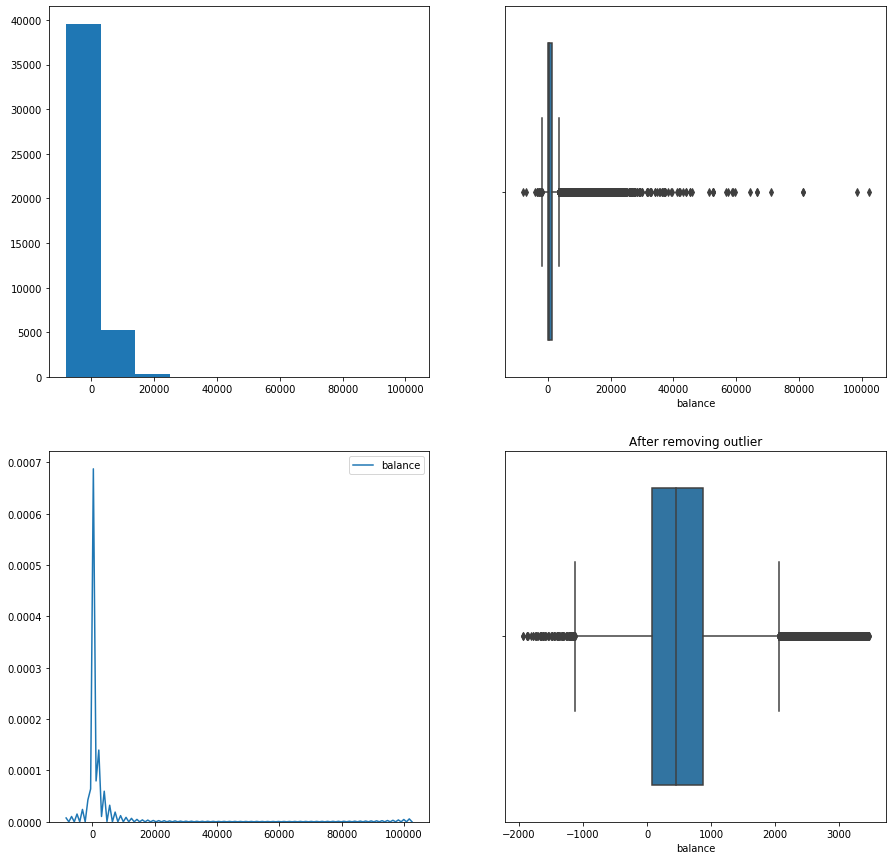

In [40]:
plt.figure(1,figsize=(15,15))
plt.subplot(221)   
plt.hist(df['balance'])
plt.subplot(222)
sns.boxplot(df['balance'])
plt.subplot(223)
sns.kdeplot(df['balance'])
remove_outlier(df,'balance')
plt.subplot(224)
plt.title("After removing outlier")
sns.boxplot(df['balance'])

# Appling Bucket of Age Coloum

In [41]:
def Age_estimator(i):
    a = 0
    if i<30:
        a = 20
    elif i>=30 and i<39:
        a = 30
    elif i>=40 and i<49:
        a = 40
    elif i>=50 and i<59:
        a = 50
    else:
        a = 60
    return a

In [42]:
df['age'] = df.age.apply(lambda x: Age_estimator(x))

In [43]:
df.head()

,age,job,education,default,housing,loan,day,month,duration,campaign,...,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,balance
0,50,10,0.150064,0,1,0,0.112565,0.067195,4.35,0.145976,...,1,0,0,0,1,0,0,0,1,2143.0
1,40,6,0.105594,0,1,0,0.112565,0.067195,2.52,0.145976,...,0,1,0,0,1,0,0,0,1,29.0
2,30,3,0.105594,0,1,1,0.112565,0.067195,1.27,0.145976,...,1,0,0,0,1,0,0,0,1,2.0
3,40,2,0.135703,0,1,0,0.112565,0.067195,1.53,0.145976,...,1,0,0,0,1,0,0,0,1,1506.0
4,30,7,0.135703,0,0,0,0.112565,0.067195,3.30,0.145976,...,0,1,0,0,1,0,0,0,1,1.0


In [44]:
df.columns

Index(['age', 'job', 'education', 'default', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'y', 'marital_divorced',
       'marital_married', 'marital_single', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'balance'],
      dtype='object')

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
y_res =  df["y"]
X_res = df.drop(columns=['y'],axis=1)




# As per EDA i found that data is highly unblanced so i am appling Randomoversampler for balancing the data 

In [47]:
from imblearn.over_sampling import RandomOverSampler

Using TensorFlow backend.


In [48]:
os = RandomOverSampler()
X_res,y_res = os.fit_sample(X_res,y_res)

In [49]:
X_res.shape

(79720, 23)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.3, random_state=42)

In [51]:
from sklearn.preprocessing import Normalizer

In [52]:
scaler = Normalizer().fit(X_train)
standarized_x = scaler.transform(X_train)
standarized_x_test = scaler.transform(X_test)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [54]:
model = RandomForestClassifier()

In [55]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9668840943301555
[[11204   779]
 [   13 11920]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.97     11983
           1       0.94      1.00      0.97     11933

    accuracy                           0.97     23916
   macro avg       0.97      0.97      0.97     23916
weighted avg       0.97      0.97      0.97     23916



# Saving Random forest machine learning Model 

In [56]:
import pickle

In [57]:
Pkl_Filename = "Pickle_RL_Model1.pk2"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

# Appling Stratified Cross Validation

In [58]:
X_res = pd.DataFrame(X_res)
y_res = pd.DataFrame(y_res)

In [59]:
from sklearn.model_selection import StratifiedKFold


accuracy = []

skf = StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(X_res,y_res)

for train_index, test_index in skf.split(X_res,y_res):
    print("Train:", train_index,"Val",test_index)
    X1_train , X1_test = X_res.iloc[train_index],X_res.iloc[test_index]
    y1_train , y1_test = y_res.iloc[train_index],y_res.iloc[test_index]
    
    model.fit(X1_train,y1_train)
    prediction = model.predict(X1_test)
    score = accuracy_score(prediction,y1_test)
    accuracy.append(score)
    
print(accuracy)


Train: [ 4107  4108  4109 ... 79717 79718 79719] Val [    0     1     2 ... 42646 42648 42651]


/home/nitin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train: [    0     1     2 ... 79717 79718 79719] Val [ 4107  4108  4109 ... 47829 47830 47831]


/home/nitin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train: [    0     1     2 ... 79717 79718 79719] Val [ 8241  8242  8243 ... 51815 51816 51817]


/home/nitin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train: [    0     1     2 ... 79717 79718 79719] Val [12417 12418 12419 ... 55801 55802 55803]


/home/nitin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train: [    0     1     2 ... 79717 79718 79719] Val [16674 16675 16676 ... 59787 59788 59789]


/home/nitin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train: [    0     1     2 ... 79717 79718 79719] Val [20939 20940 20941 ... 63773 63774 63775]


/home/nitin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train: [    0     1     2 ... 79717 79718 79719] Val [25157 25158 25159 ... 67759 67760 67761]


/home/nitin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train: [    0     1     2 ... 79717 79718 79719] Val [29376 29377 29378 ... 71745 71746 71747]


/home/nitin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train: [    0     1     2 ... 79717 79718 79719] Val [34161 34162 34163 ... 75731 75732 75733]


/home/nitin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train: [    0     1     2 ... 75731 75732 75733] Val [38510 38511 38512 ... 79717 79718 79719]


/home/nitin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[0.9724034119417962, 0.976668339187155, 0.8995233316608129, 0.9451831409934772, 0.9660060210737581, 0.9736578023080783, 0.9374059207225288, 0.6940541896638234, 0.9179628700451581, 0.7843702960361264]


In [60]:
np.array(accuracy).mean()

0.9067235323632715

# Visulization of on First Stomps of Random Forest

[Text(385.420229610017, 535.3636363636364, 'X[15] <= 0.5\ngini = 0.5\nsamples = 45265\nvalue = [35810, 35938]'),
 Text(128.76882189534754, 518.8909090909091, 'X[0] <= 55.0\ngini = 0.421\nsamples = 12888\nvalue = [14179, 6096]'),
 Text(81.30394424899588, 502.41818181818184, 'X[8] <= 7.875\ngini = 0.391\nsamples = 11083\nvalue = [12762, 4640]'),
 Text(36.837867919154455, 485.9454545454546, 'X[16] <= 0.5\ngini = 0.193\nsamples = 8278\nvalue = [11569, 1407]'),
 Text(15.05549347630848, 469.4727272727273, 'X[21] <= 0.5\ngini = 0.105\nsamples = 6709\nvalue = [9896, 585]'),
 Text(1.0022785104861376, 453.0, 'X[8] <= 0.35\ngini = 0.228\nsamples = 50\nvalue = [11, 73]'),
 Text(0.7795499526003293, 436.52727272727276, 'gini = 0.0\nsamples = 2\nvalue = [3, 0]'),
 Text(1.225007068371946, 436.52727272727276, 'X[1] <= 11.0\ngini = 0.178\nsamples = 48\nvalue = [8, 73]'),
 Text(1.0022785104861376, 420.05454545454546, 'X[9] <= 0.129\ngini = 0.098\nsamples = 47\nvalue = [4, 73]'),
 Text(0.7795499526003293,

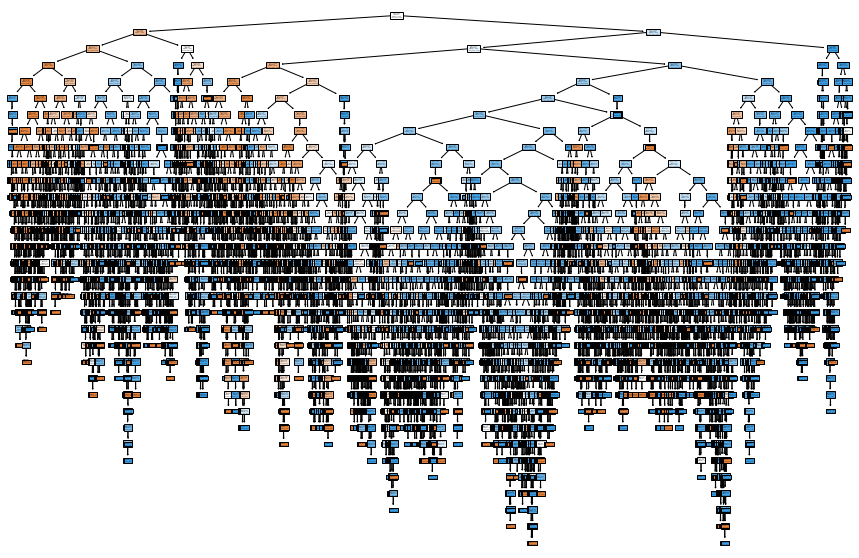

In [61]:
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(model.estimators_[1],filled=True)

# Visulization of on Third Stomps of Random Forest

[Text(425.72397637319506, 536.4473684210526, 'X[8] <= 3.425\ngini = 0.5\nsamples = 45340\nvalue = [35938, 35810]'),
 Text(148.23981498707542, 522.1421052631579, 'X[17] <= 0.5\ngini = 0.346\nsamples = 17749\nvalue = [21772, 6224]'),
 Text(81.82590827073017, 507.8368421052632, 'X[21] <= 0.5\ngini = 0.413\nsamples = 12982\nvalue = [14508, 5962]'),
 Text(33.79642832168943, 493.5315789473684, 'X[20] <= 0.5\ngini = 0.5\nsamples = 3526\nvalue = [2676, 2797]'),
 Text(21.51113110033247, 479.2263157894737, 'X[4] <= 0.5\ngini = 0.434\nsamples = 2440\nvalue = [2593, 1208]'),
 Text(6.404919997202922, 464.92105263157896, 'X[22] <= 112.0\ngini = 0.449\nsamples = 823\nvalue = [439, 849]'),
 Text(2.4972315281583146, 450.61578947368423, 'X[22] <= -34.5\ngini = 0.459\nsamples = 120\nvalue = [117, 65]'),
 Text(2.2702104801439225, 436.3105263157895, 'gini = 0.0\nsamples = 18\nvalue = [25, 0]'),
 Text(2.7242525761727068, 436.3105263157895, 'X[10] <= 0.309\ngini = 0.485\nsamples = 102\nvalue = [92, 65]'),
 T

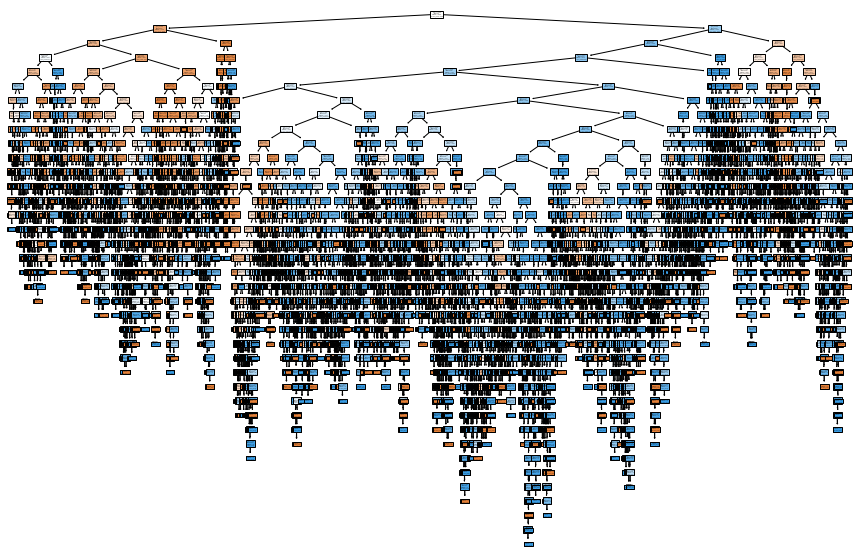

In [62]:
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(model.estimators_[3],filled=True)

# Selecting Best thersold Value 

In [63]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [64]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 0.9999999999999999
RF test roc-auc: 0.9995585697296988


In [65]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.918342434931352
Adaboost test roc-auc: 0.9164596596484255


In [66]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.8943017642174548
Logistic test roc-auc: 0.8914740168057992


/home/nitin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [67]:
for model in [rf_model,log_classifier,ada_classifier]:
    #k = model.predict_proba(X_test)[:,1]
    k = pd.Series(model.predict_proba(X_test)[:,1])
    print(k)

0        1.00
1        1.00
2        1.00
3        0.00
4        0.00
         ... 
23911    0.01
23912    0.10
23913    1.00
23914    0.44
23915    1.00
Length: 23916, dtype: float64
0        0.971670
1        0.972171
2        0.671755
3        0.052250
4        0.100241
           ...   
23911    0.094134
23912    0.403777
23913    0.979805
23914    0.714444
23915    0.998019
Length: 23916, dtype: float64
0        0.510652
1        0.517359
2        0.506214
3        0.477780
4        0.486412
           ...   
23911    0.475294
23912    0.496122
23913    0.517270
23914    0.504553
23915    0.509402
Length: 23916, dtype: float64


In [68]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9844472957545186


In [69]:
pd.concat(pred,axis=1)

,0,1,2
0,1.00,0.971670,0.510652
1,1.00,0.972171,0.517359
2,1.00,0.671755,0.506214
3,0.00,0.052250,0.477780
4,0.00,0.100241,0.486412
...,...,...,...
23911,0.01,0.094134,0.475294
23912,0.10,0.403777,0.496122
23913,1.00,0.979805,0.517270
23914,0.44,0.714444,0.504553


In [70]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.90307281, 0.90307281, 0.90221217, ..., 0.44070488, 0.44059646,
       0.11256234])

In [71]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
4497,0.508693,0.949448
4495,0.509257,0.949406
4498,0.508522,0.949406
4499,0.507798,0.949406
4466,0.515437,0.949406


# As from above i found that best threslod value for Random forest is 0.53

In [72]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# AUC curve for Model 

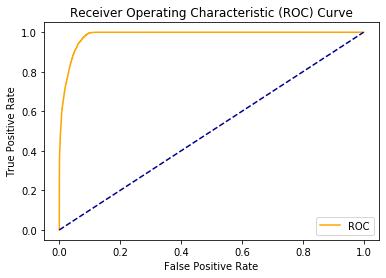

In [73]:

plot_roc_curve(fpr,tpr)

# Model interpretation using eli5 lib

In [74]:
import eli5

/home/nitin/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/nitin/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [75]:
class_names = ['Yes','No'] 

In [76]:
feature_names = ['age', 'job', 'education', 'default', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous',
       'marital_divorced', 'marital_married', 'marital_single',
       'contact_cellular', 'contact_telephone', 'contact_unknown',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'balance']

In [77]:
# Showing the Weight for our model
eli5.show_weights(rf_model,top=10)


Weight,Feature
0.3704 ± 0.0315,x8
0.0982 ± 0.0254,x7
0.0847 ± 0.0127,x22
0.0756 ± 0.0106,x6
0.0601 ± 0.0572,x10
0.0458 ± 0.0088,x1
0.0385 ± 0.0062,x9
0.0342 ± 0.0056,x0
0.0284 ± 0.0505,x20
0.0267 ± 0.0150,x4


In [78]:
# Clearly Define Feature Names
eli5.show_weights(rf_model,feature_names =feature_names,target_names=class_names,top=10)

Weight,Feature
0.3704 ± 0.0315,duration
0.0982 ± 0.0254,month
0.0847 ± 0.0127,balance
0.0756 ± 0.0106,day
0.0601 ± 0.0572,pdays
0.0458 ± 0.0088,job
0.0385 ± 0.0062,campaign
0.0342 ± 0.0056,age
0.0284 ± 0.0505,poutcome_success
0.0267 ± 0.0150,housing


In [79]:
# Show Explaination For A Single Prediction
eli5.show_prediction(rf_model,X_test.iloc[0],feature_names=feature_names,target_names=class_names)

In [80]:
# Show Explaination For A Single Prediction
eli5.show_prediction(rf_model,X_test.iloc[3],feature_names=feature_names,target_names=class_names)